In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'bikes.csv')
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [3]:
df.shape

(7857, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


In [5]:
df.isnull().sum()

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# filling the missing value with mode for Location column
df['location'].mode()[0]

'delhi'

In [8]:
df['location'].fillna(df['location'].mode()[0],inplace=True)

In [9]:
df['mileage'].unique()

array(['\n\n 35 kmpl', '\n\n 30 kmpl', '\n\n 28 Kms', '\n\n ',
       '\n\n 65 kmpl', '\n\n 40 Kmpl', '\n\n 25 kmpl', '\n\n 58 Kmpl',
       '\n\n 32 kmpl', '\n\n 40 kmpl', '\n\n 65 Kmpl', '\n\n 30 Kmpl',
       '\n\n 42 Kmpl', '\n\n 37 Kmpl', '\n\n 37 kmpl', '\n\n 60 Kmpl',
       '\n\n 53 kmpl', '\n\n 55 kmpl', '\n\n 45 kmpl', '\n\n 38 kmpl',
       '\n\n 45-55', '\n\n 29 kmpl', '\n\n 75 kmpl', '\n\n 63kmpl',
       '\n\n 31.85 kmpl', '\n\n 45-55 kmpl', '\n\n 5 kmpl',
       '\n\n 50 kmpl', '\n\n 45 Kmpl', '\n\n 35 Kmpl', '\n\n 22 kmpl',
       '\n\n 26 kmpl', '\n\n 42 kmpl', '\n\n 104 Kmpl', '\n\n 39.4 kmpl',
       '\n\n 89 kmpl', '\n\n 52 Kmpl', '\n\n 80 Kmpl', '\n\n 84 Kmpl',
       '\n\n 43 kmpl', nan, '\n\n 55-60 Kmpl', '\n\n Liquid Cooled',
       '\n\n 65kmpl', '\n\n 95 kmpl', '\n\n 53.72 kmpl', '\n\n 26kmpl',
       '\n\n 45.8 kmpl', '\n\n 48 kmpl', '\n\n 52 kmpl', '\n\n 57 kmpl',
       '\n\n  60 kmpl', '\n\n 67 kmpl', '\n\n 81 kmpl', '\n\n 55 Kmpl',
       '\n\n 60 kmpl', 

In [10]:
df['mileage'] = df['mileage'].str.replace('\n','')

In [11]:
df['mileage'] = df['mileage'].str.lower()

In [12]:
df['mileage'] = df['mileage'].str.replace('kmpl','')

In [13]:
df['mileage'] = df['mileage'].str.replace('kms','')

In [14]:
df['mileage'].unique()

array([' 35 ', ' 30 ', ' 28 ', ' ', ' 65 ', ' 40 ', ' 25 ', ' 58 ',
       ' 32 ', ' 42 ', ' 37 ', ' 60 ', ' 53 ', ' 55 ', ' 45 ', ' 38 ',
       ' 45-55', ' 29 ', ' 75 ', ' 63', ' 31.85 ', ' 45-55 ', ' 5 ',
       ' 50 ', ' 22 ', ' 26 ', ' 104 ', ' 39.4 ', ' 89 ', ' 52 ', ' 80 ',
       ' 84 ', ' 43 ', nan, ' 55-60 ', ' liquid cooled', ' 65', ' 95 ',
       ' 53.72 ', ' 26', ' 45.8 ', ' 48 ', ' 57 ', '  60 ', ' 67 ',
       ' 81 ', ' 59 ', ' 83 ', ' 40-45', ' 70 ', ' 64 ', ' 53', ' 18 ',
       ' 45-60 ', ' 96.9 ', ' 62 ', ' 46.40 ', ' 77 ', ' 85 ', ' 56 ',
       ' 68 ', ' 38.5 ', ' 74 ', ' 55.47 ', ' 25', ' 82.4 ', ' 15 ',
       ' 90 ', ' 63.97 ', ' 71 ', ' 30  ', ' 16 ', ' 20 ', ' 39.1 ',
       ' 13 ', ' 21 ', ' 18.86 ', ' 82 ', ' 12 ', ' 17 ', ' 27 ', ' 19 ',
       ' 72 ', ' 40', ' 69 ', ' 55', ' 54 ', ' 12', ' 12.5 ', ' 20.3 ',
       ' 17.85 ', ' 14 ', ' 20.40 ', ' 23 '], dtype=object)

In [15]:
df['mileage'] = df['mileage'].replace(' liquid cooled',np.nan)

In [16]:
df[df['mileage'].str.contains('-',na=False)]

,model_name,model_year,kms_driven,owner,location,mileage,power,price
33,Hero Achiever 150cc 2019,2019,15000 Km,first owner,jaunpur,45-55,13 bhp,48000
70,Hero Splendor ISmart Self Drum Alloy 2017,2017,34000 Km,first owner,chittorgarh,45-55,7 Kw,45000
115,Hero Achiever Disc 150cc 2018,2018,48000 Km,first owner,chittorgarh,45-55,13 bhp,48000
129,Hero Splendor ISmart Self Drum Alloy 2017,2017,43000 Km,first owner,chittorgarh,45-55,7 Kw,49000
145,Honda Livo 110cc 2015,2015,Mileage 55-60 Kmpl,first owner,vadodara,55-60,8.25 Bhp,37500
...,...,...,...,...,...,...,...,...
7628,KTM RC 125CC 2019,2019,5000 Km,first owner,mumbai,40-45,14.5hp,135000
7641,Hero Passion PRO 100 cc 2004,2004,45000 Km,first owner,cuttack,45-55,6.15 kW (8.36 Ps),26000
7645,Hero Splendor 100cc 2003,2003,60345 Km,first owner,cuttack,45-60,6.15kW (8.36 Ps),0
7765,Hero CBZ Xtreme 150 cc 2012,2012,18000 Km,first owner,delhi,45-55,11.64 KW (15.6 BHP),20000


In [17]:
avg = df['mileage'].tolist()
avg

[' 35 ',
 ' 35 ',
 ' 30 ',
 ' 28 ',
 ' ',
 ' 35 ',
 ' 65 ',
 ' 40 ',
 ' 25 ',
 ' 58 ',
 ' 35 ',
 ' 32 ',
 ' 40 ',
 ' 65 ',
 ' 30 ',
 ' 42 ',
 ' 35 ',
 ' 37 ',
 ' 37 ',
 ' 40 ',
 ' 60 ',
 ' 37 ',
 ' 65 ',
 ' 53 ',
 ' 37 ',
 ' 40 ',
 ' 55 ',
 ' 45 ',
 ' 35 ',
 ' 35 ',
 ' 42 ',
 ' 38 ',
 ' 35 ',
 ' 45-55',
 ' 58 ',
 ' 29 ',
 ' 55 ',
 ' 65 ',
 ' 75 ',
 ' 35 ',
 ' ',
 ' 38 ',
 ' 35 ',
 ' 53 ',
 ' 38 ',
 ' 65 ',
 ' 37 ',
 ' 55 ',
 ' 65 ',
 ' 40 ',
 ' ',
 ' 35 ',
 ' 32 ',
 ' 25 ',
 ' 35 ',
 ' 63',
 ' 65 ',
 ' 38 ',
 ' 65 ',
 ' 55 ',
 ' 28 ',
 ' 31.85 ',
 ' ',
 ' ',
 ' 40 ',
 ' 40 ',
 ' 45 ',
 ' 35 ',
 ' ',
 ' ',
 ' 45-55 ',
 ' ',
 ' 5 ',
 ' 38 ',
 ' 45 ',
 ' ',
 ' 5 ',
 ' 5 ',
 ' 65 ',
 ' 45 ',
 ' 50 ',
 ' 45 ',
 ' 35 ',
 ' 35 ',
 ' ',
 ' ',
 ' 35 ',
 ' 35 ',
 ' 35 ',
 ' 35 ',
 ' ',
 ' 22 ',
 ' 38 ',
 ' 35 ',
 ' 58 ',
 ' 26 ',
 ' 42 ',
 ' 37 ',
 ' 65 ',
 ' 104 ',
 ' ',
 ' 40 ',
 ' 38 ',
 ' 65 ',
 ' 42 ',
 ' 55 ',
 ' ',
 ' ',
 ' 65 ',
 ' ',
 ' 28 ',
 ' 39.4 ',
 ' 42 ',
 ' 89 ',
 ' 52 ',
 ' 45-

In [18]:
# taking avg value for the range values
def find_avg(lst):
    new_list = []
    for item in lst:
        if isinstance(item, str) and "-" in item:  # Check if item contains '-'
            start, end = map(int, item.split("-"))  # Split and convert to int
            avg = (start + end) / 2  # Calculate average
            new_list.append(avg)
        else:
            new_list.append(item)  # Keep other values unchanged
    return new_list

df['mileage'] = find_avg(avg)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7857 non-null   object
 5   mileage     7810 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


In [20]:
df['mileage'] = pd.to_numeric(df['mileage'],errors='coerce')

<function matplotlib.pyplot.show(close=None, block=None)>

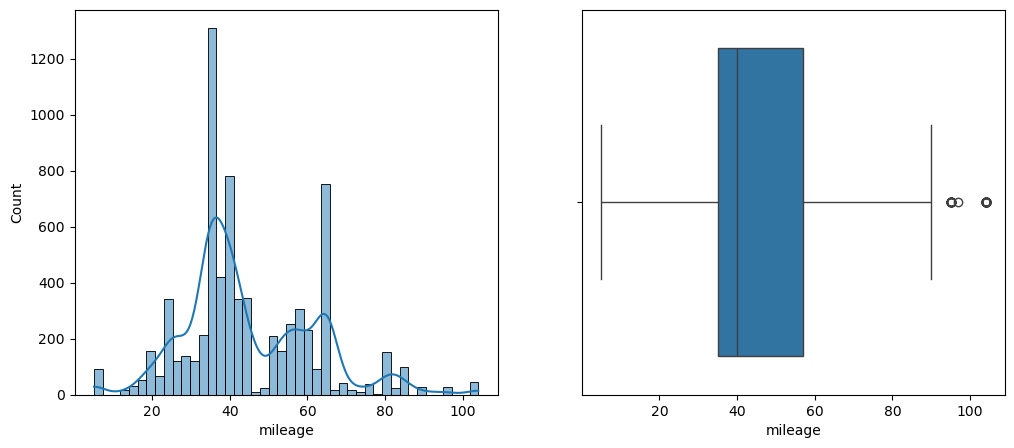

In [21]:
plt.figure(figsize=(12, 5)) 
plt.subplot(1,2,1)
sns.histplot(df['mileage'],kde = True)

plt.subplot(1,2,2)
sns.boxplot(x = df['mileage'])
plt.show

In [22]:
df['mileage'].skew()

0.6573706275751209

In [23]:
# filling the missing value with median
df['mileage'].median()

40.0

In [24]:
df['mileage'] = df['mileage'].fillna(df['mileage'].median())

In [25]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35.0,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35.0,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30.0,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28.0,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,40.0,30 bhp,197500


In [26]:
df['power'].isnull().sum()

31

In [27]:
df['power'].unique()

array(['19 bhp', '19.80 bhp', '28 bhp', '34.50 bhp', '30 bhp', '25 bhp',
       '17 bhp', '20.21 bhp', '42.90 bhp', '13 bhp', '24.50 bhp',
       '19.8 Bhp', '10 bhp', '18 bhp', '23.20 bhp', '14 bhp', '14.85 bhp',
       '12 Bhp', '21 bhp', '24.80 bhp', '26.15 bhp', '8.90 bhp', '15 bhp',
       '9 bhp', '19.80 Bhp', '8.60 bhp', '11 bhp', '24.6 bhp',
       '27.20 bhp', '19.1 bhp', '8 bhp', '29.63 bhp', '16.1 bhp',
       '20.23 BHP', '26.1 bhp', '18.70 bhp', '7 Kw', '9.30 bhp',
       '8.2 Bhp', '14.30 bhp', '11.90 bhp', '17.2 bhp', '24.16 bhp',
       '25.10 bhp', '10.72 bhp', '33 bhp', '29.10 bhp', '16 bhp',
       '8.20 bhp', '16.70 bhp', '18.23 bhp', '15.5 PS', '8.10 bhp',
       '18.1 bhp', '15.44 bhp', '7.7', nan, '7.91 bhp', '8.25 bhp',
       '17.03 bhp', '20.30 bhp', '15.2 bhp @ 8500 rpm', '8.25 Bhp',
       '23.19 bhp', '27 bhp', '17.30 bhp', '14.4PS', '7.40 bhp',
       '14.3 bhp', '14.79 bhp', '42.30 bhp', '29.6 bhp', '20.78 bhp',
       '19.8 bhp', '20 bhp', '12.9 Bhp', '1

In [28]:
import pandas as pd
import re

# Function to clean BHP column and handle ranges
def clean_power(value):
    if pd.isna(value):  # Handle NaN values
        return None
    
    value = value.lower()  # Convert to lowercase
    
    # Check if value contains a range (e.g., "100-110 BHP")
    range_match = re.findall(r"(\d+\.?\d*)-(\d+\.?\d*)", value)
    if range_match:
        num1, num2 = map(float, range_match[0])  # Extract both numbers
        avg_value = (num1 + num2) / 2  # Take the average
        return round(avg_value, 2)

    # Extract single numeric value
    match = re.search(r"(\d+\.?\d*)", value)
    if match:
        num = float(match.group(1))
        
        # Convert kW to BHP
        if "kw" in value:
            num *= 1.341
        
        # Convert PS to BHP
        elif "ps" in value:
            num *= 0.986

        return round(num, 2)  # Round to 2 decimal places
    
    return None  # Return None if no valid number is found

# Apply function to the column
df['power'] = df['power'].apply(clean_power)

<function matplotlib.pyplot.show(close=None, block=None)>

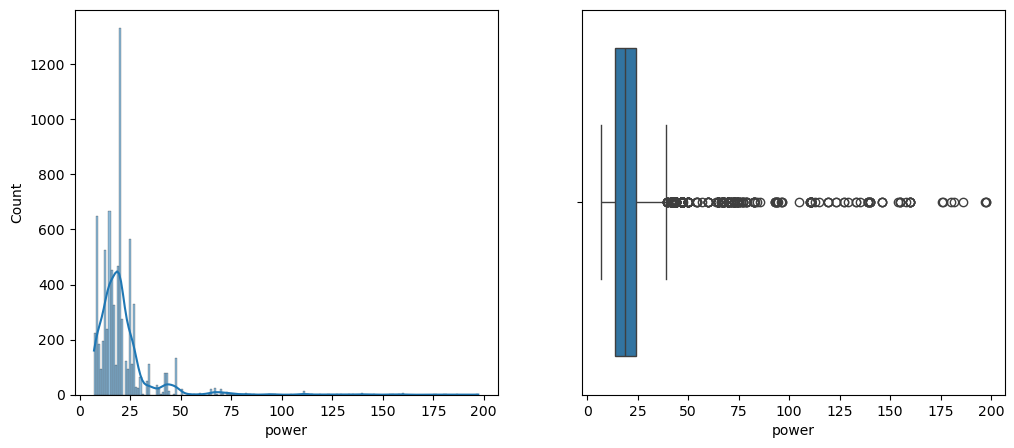

In [29]:
plt.figure(figsize=(12, 5)) 
plt.subplot(1,2,1)
sns.histplot(df['power'],kde = True)

plt.subplot(1,2,2)
sns.boxplot(x = df['power'])
plt.show

In [30]:
df['power'].median()

19.0

In [31]:
# filling missing value with median for power column
df['power'] = df['power'].fillna(df['power'].median())

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_name  7857 non-null   object 
 1   model_year  7857 non-null   int64  
 2   kms_driven  7857 non-null   object 
 3   owner       7857 non-null   object 
 4   location    7857 non-null   object 
 5   mileage     7857 non-null   float64
 6   power       7857 non-null   float64
 7   price       7857 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 491.2+ KB


In [33]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35.0,19.0,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35.0,19.8,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30.0,28.0,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28.0,34.5,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,40.0,30.0,197500


In [34]:
df['model_name'].unique()

array(['Bajaj Avenger Cruise 220 2017',
       'Royal Enfield Classic 350cc 2016', 'Hyosung GT250R 2012', ...,
       'Bajaj Discover 125cc 2009', 'Bajaj Pulsar 200cc 2011',
       'Hero CD Deluxe 100cc 2004'], dtype=object)

In [35]:
import re

def clean_model_name(name):
    if pd.isna(name):  # Handle NaN values
        return None, None, None, None
    
    name = name.strip()

    # Extract year (assuming it's always at the end)
    year_match = re.search(r'\b(19\d{2}|20\d{2})\b', name)
    year = int(year_match.group()) if year_match else None

    # Extract engine capacity (CC)
    cc_match = re.search(r'(\d{2,4})\s?cc', name, re.IGNORECASE)
    cc = int(cc_match.group(1)) if cc_match else None

    # Extract brand (first word)
    words = name.split()
    brand = words[0] if words else None

    # Extract model (everything between brand and year)
    model = name.replace(str(year), '').replace(str(cc) + 'cc', '').strip() if year else name.replace(str(cc) + 'cc', '').strip()

    return brand, model, cc, year

# Apply function and create new columns
df[['Brand', 'Model', 'CC', 'Year']] = df['model_name'].apply(lambda x: pd.Series(clean_model_name(x)))


In [36]:
df['CC'].unique()

array([  nan,  350.,  330.,  200.,  180.,  390.,  150.,  410.,  125.,
        110.,  220.,  223.,  500.,  250.,  100.,  535.,  160.,  295.,
        135.,  650.,  300.,  900.,  320.,  675., 1750., 1745., 1000.,
       1380., 1200.,  865., 1300., 1050., 1800., 1700., 1262.,  800.,
        149.,  750.,  109.])

In [37]:
df['CC'].mode()

0    150.0
Name: CC, dtype: float64

In [38]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,Brand,Model,CC,Year
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35.0,19.0,63500,Bajaj,Bajaj Avenger Cruise 220,NaN,2017
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35.0,19.8,115000,Royal,Royal Enfield Classic,350.0,2016
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30.0,28.0,300000,Hyosung,Hyosung GT250R,NaN,2012
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28.0,34.5,100000,Bajaj,Bajaj Dominar 400 ABS,NaN,2017
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,40.0,30.0,197500,Jawa,Jawa Perak,330.0,2020


In [39]:
df[df['Model'].str.contains(r'\d', na=False)]


,model_name,model_year,kms_driven,owner,location,mileage,power,price,Brand,Model,CC,Year
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35.0,19.00,63500,Bajaj,Bajaj Avenger Cruise 220,NaN,2017
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30.0,28.00,300000,Hyosung,Hyosung GT250R,NaN,2012
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28.0,34.50,100000,Bajaj,Bajaj Dominar 400 ABS,NaN,2017
7,TVS Apache RTR 200 4V Dual Channel ABS BS6 2020,2020,Mileage 40 Kmpl,first owner,hyderabad,40.0,20.21,120000,TVS,TVS Apache RTR 200 4V Dual Channel ABS BS6,NaN,2020
9,Yamaha FZ16 150cc 2014,2014,Mileage 58 Kmpl,first owner,bangalore,58.0,13.00,40000,Yamaha,Yamaha FZ16,150.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
7845,Bajaj Discover 100M 2012,2012,Mileage 80 Kmpl,first owner,delhi,80.0,9.10,35000,Bajaj,Bajaj Discover 100M,NaN,2012
7850,TVS Apache RTR 160 4V Carburetor With Rear Dis...,2018,16510 Km,first owner,ahmedabad,40.0,16.10,60000,TVS,TVS Apache RTR 160 4V Carburetor With Rear Disc,NaN,2018
7851,Bajaj Pulsar RS200 ABS 2015,2015,Mileage 35 Kmpl,first owner,sidlaghatta,35.0,24.16,80000,Bajaj,Bajaj Pulsar RS200 ABS,NaN,2015
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,42.0,16.00,55000,Yamaha,Yamaha YZF-R15,150.0,2011


In [40]:
df['CC'].isnull().sum()

2096

In [41]:
df[['Model','CC']]

,Model,CC
0,Bajaj Avenger Cruise 220,NaN
1,Royal Enfield Classic,350.0
2,Hyosung GT250R,NaN
3,Bajaj Dominar 400 ABS,NaN
4,Jawa Perak,330.0
...,...,...
7852,Yamaha YZF-R15,150.0
7853,Bajaj Discover,100.0
7854,Bajaj Pulsar,180.0
7855,Bajaj V15,150.0


In [42]:
df['extracted'] = df['Model'].str.extract(r'(\d+)', expand=False)
df['CC'] = df['CC'].fillna(df['extracted'])
df['CC'] = pd.to_numeric(df['CC'])
df.drop(columns=['extracted'], inplace=True)

In [43]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,Brand,Model,CC,Year
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35.0,19.0,63500,Bajaj,Bajaj Avenger Cruise 220,220.0,2017
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35.0,19.8,115000,Royal,Royal Enfield Classic,350.0,2016
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30.0,28.0,300000,Hyosung,Hyosung GT250R,250.0,2012
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28.0,34.5,100000,Bajaj,Bajaj Dominar 400 ABS,400.0,2017
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,40.0,30.0,197500,Jawa,Jawa Perak,330.0,2020


In [44]:
df.dropna(inplace=True)

In [45]:
df['kms_driven'].unique()

array(['17000 Km', '50000 Km', '14795 Km', ..., '66780 Km', '16510 Km',
       '6407 Km'], dtype=object)

In [46]:
df['kms_driven'] = df['kms_driven'].str.lower()

In [47]:
df['kms_driven'] = df['kms_driven'].str.extract(r'^\s*(\d+)\s*km(?:s)?\s*$', expand=False)

In [48]:
df['kms_driven'] = pd.to_numeric(df['kms_driven'])

<function matplotlib.pyplot.show(close=None, block=None)>

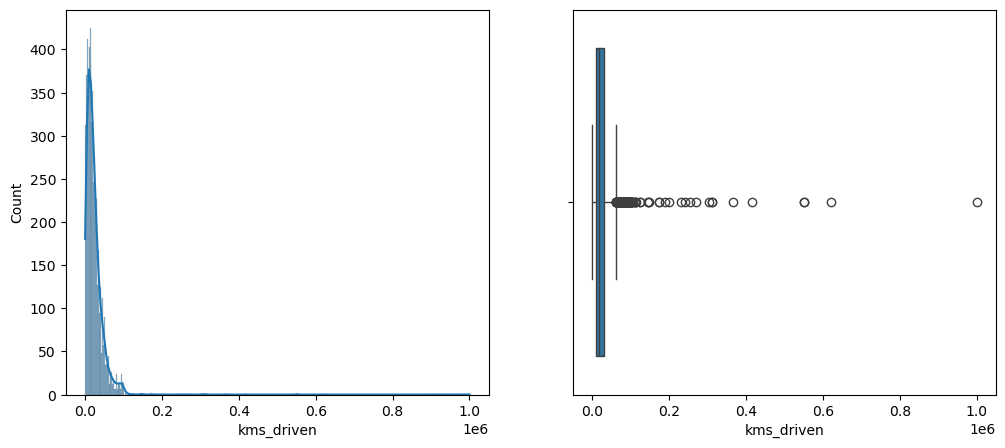

In [49]:
plt.figure(figsize=(12, 5)) 
plt.subplot(1,2,1)
sns.histplot(df['kms_driven'],kde = True)

plt.subplot(1,2,2)
sns.boxplot(x = df['kms_driven'])
plt.show

In [50]:
int(df['kms_driven'].mean())

23499

In [51]:
df['kms_driven'] = df['kms_driven'].fillna(int(df['kms_driven'].mean()))

In [52]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,Brand,Model,CC,Year
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,first owner,hyderabad,35.0,19.0,63500,Bajaj,Bajaj Avenger Cruise 220,220.0,2017
1,Royal Enfield Classic 350cc 2016,2016,50000.0,first owner,hyderabad,35.0,19.8,115000,Royal,Royal Enfield Classic,350.0,2016
2,Hyosung GT250R 2012,2012,14795.0,first owner,hyderabad,30.0,28.0,300000,Hyosung,Hyosung GT250R,250.0,2012
3,Bajaj Dominar 400 ABS 2017,2017,23499.0,first owner,pondicherry,28.0,34.5,100000,Bajaj,Bajaj Dominar 400 ABS,400.0,2017
4,Jawa Perak 330cc 2020,2020,2000.0,first owner,bangalore,40.0,30.0,197500,Jawa,Jawa Perak,330.0,2020


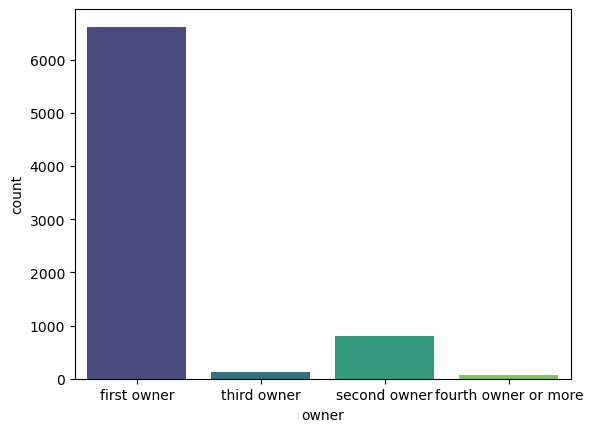

In [58]:
sns.countplot(data = df,x = df['owner'],palette='viridis')
plt.show()

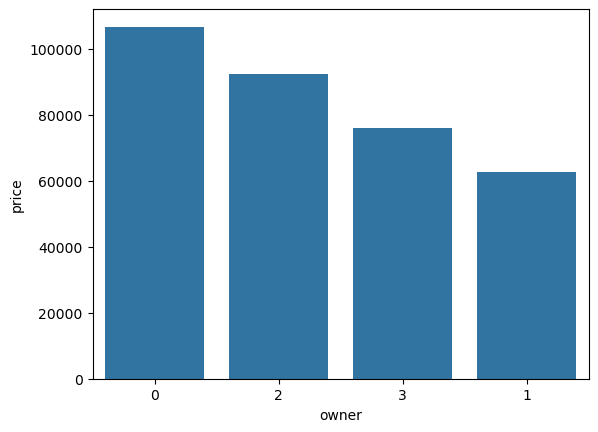

In [183]:
sns.barplot(data =df,x ='owner',y = 'price',order=df.groupby("owner")["price"].mean().sort_values(ascending = False).index,errorbar=None )
plt.show()

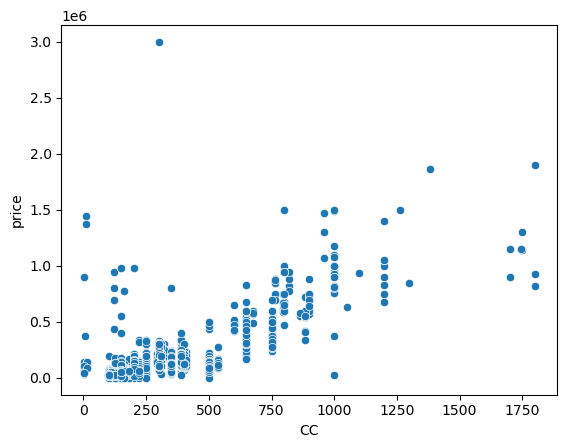

In [67]:
sns.scatterplot(data = df,x ='CC',y='price')
plt.show()

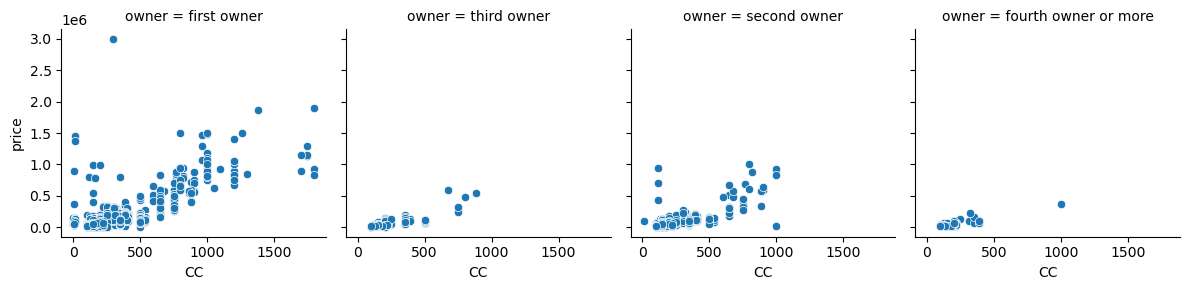

In [71]:
g = sns.FacetGrid(df, col="owner")
g.map_dataframe(sns.scatterplot, x="CC", y="price")
plt.show()

In [82]:
df['bike_age'] = 2025 - df['model_year']

In [108]:
corrected_brands = {
    "Bajaj": "Bajaj",
    "Royal": "Royal Enfield",
    "Hyosung": "Hyosung",
    "Jawa": "Jawa",
    "KTM": "KTM",
    "TVS": "TVS",
    "Yamaha": "Yamaha",
    "yamaha": "Yamaha",  
    "Honda": "Honda",
    "Hero": "Hero",
    "Suzuki": "Suzuki",
    "Husqvarna": "Husqvarna",
    "Mahindra": "Mahindra",
    "Kawasaki": "Kawasaki",
    "Benelli": "Benelli",
    "Harley-Davidson": "Harley-Davidson",
    "Triumph": "Triumph",
    "Ducati": "Ducati",
    "BMW": "BMW Motorrad",
    "Ideal": "Ideal Jawa",  
    "BenelliImperiale": "Benelli", 
    "Moto": "Moto Guzzi",
    "Fb": "FB Mondial",
    "Indian": "Indian Motorcycle",
    "Yazdi": "Yezdi",  
    "Aprilia": "Aprilia",
    "MV": "MV Agusta",
}


In [110]:
df["Brand"] = df["Brand"].replace(corrected_brands)

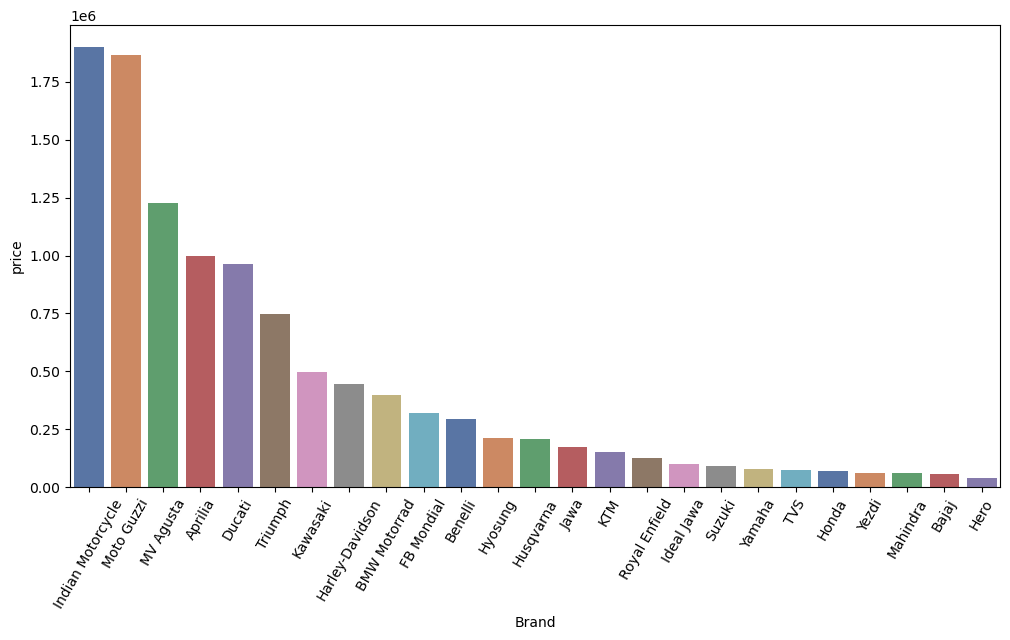

In [113]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Brand", y="price",errorbar=None,order=df.groupby("Brand")["price"].mean().sort_values(ascending = False).index,palette='deep')
plt.xticks(rotation=60)  # Rotate labels if needed
plt.show()

In [116]:
df.drop(columns=['model_name','model_year','location','Model','Year'],inplace=True)

In [117]:
df.describe()

,kms_driven,mileage,power,price,CC,bike_age
count,7639.000000,7639.000000,7639.000000,7.639000e+03,7639.000000,7639.000000
mean,23499.152769,44.643867,20.414074,1.016236e+05,246.822228,9.680848
std,25026.098514,16.183861,14.422530,1.252257e+05,160.019177,4.038955
min,0.000000,5.000000,7.000000,0.000000e+00,2.000000,4.000000
25%,12000.000000,35.000000,14.000000,4.195000e+04,150.000000,7.000000
50%,23499.000000,40.000000,19.000000,7.400000e+04,200.000000,9.000000
75%,25000.000000,55.000000,23.190000,1.237500e+05,350.000000,11.000000
max,1000000.000000,104.000000,197.300000,3.000000e+06,1800.000000,75.000000


In [123]:
numeric_cols = df.select_dtypes(include='number')

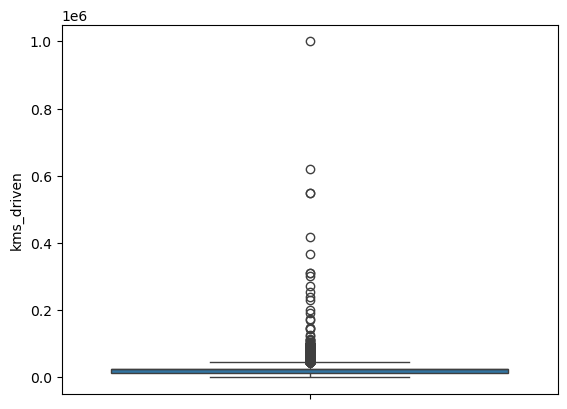

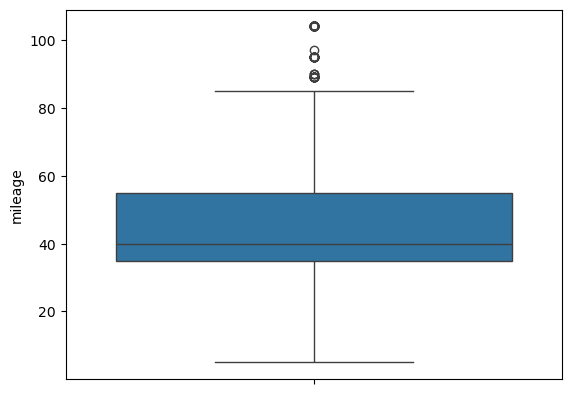

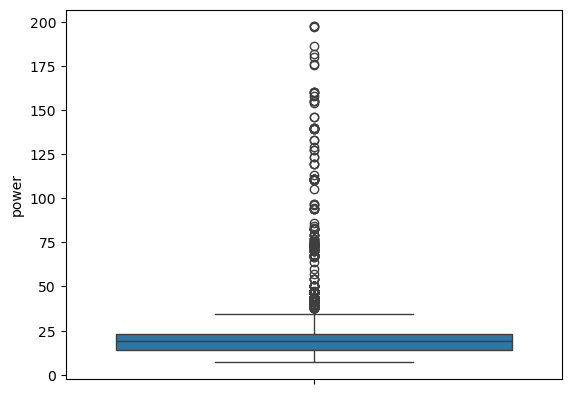

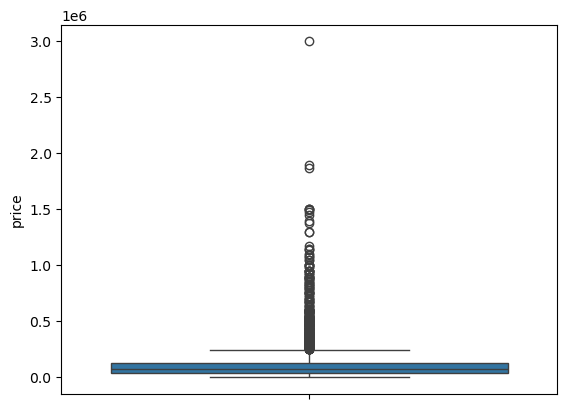

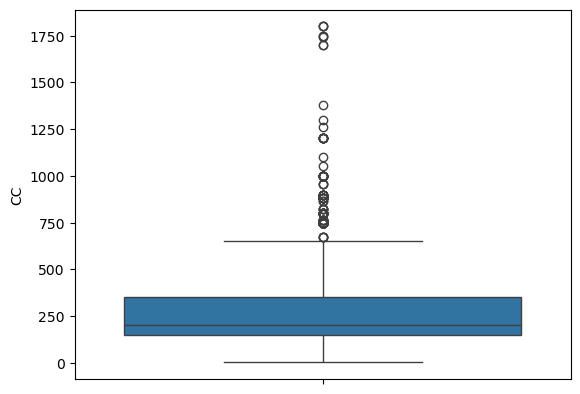

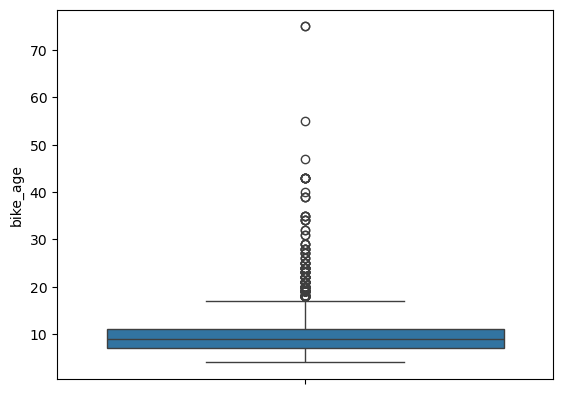

In [124]:
for column in numeric_cols:
    sns.boxplot(df[column])
    plt.show()

In [128]:
for column in numeric_cols:
    q1 = df[column].quantile(.25)
    q3 = df[column].quantile(.75)
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr  

In [137]:
df = df[(df[column] >= lb) & (df[column] <= ub)]

In [141]:
df.describe()

,kms_driven,mileage,power,price,CC,bike_age
count,7346.000000,7346.000000,7346.000000,7.346000e+03,7346.000000,7346.000000
mean,22656.003267,44.300027,20.701900,1.042614e+05,249.406344,9.184590
std,20764.360502,16.052601,14.602456,1.267616e+05,161.384053,2.894508
min,0.000000,5.000000,7.000000,0.000000e+00,2.000000,4.000000
25%,11500.000000,35.000000,14.000000,4.451250e+04,150.000000,7.000000
50%,23499.000000,40.000000,19.000000,7.500000e+04,200.000000,9.000000
75%,24000.000000,55.000000,23.200000,1.250000e+05,350.000000,11.000000
max,620010.000000,104.000000,197.300000,3.000000e+06,1800.000000,17.000000


In [151]:
df.head()

,kms_driven,owner,mileage,power,price,Brand,CC,bike_age
0,17000.0,first owner,35.0,19.0,63500,Bajaj,220.0,8
1,50000.0,first owner,35.0,19.8,115000,Royal Enfield,350.0,9
2,14795.0,first owner,30.0,28.0,300000,Hyosung,250.0,13
3,23499.0,first owner,28.0,34.5,100000,Bajaj,400.0,8
4,2000.0,first owner,40.0,30.0,197500,Jawa,330.0,5


In [152]:
from sklearn.preprocessing import LabelEncoder

In [153]:
le = LabelEncoder()

In [155]:
df['owner'] = le.fit_transform(df['owner'])

In [157]:
df['Brand'] = le.fit_transform(df['Brand'])

In [158]:
df.head()

,kms_driven,owner,mileage,power,price,Brand,CC,bike_age
0,17000.0,0,35.0,19.0,63500,2,220.0,8
1,50000.0,0,35.0,19.8,115000,18,350.0,9
2,14795.0,0,30.0,28.0,300000,10,250.0,13
3,23499.0,0,28.0,34.5,100000,2,400.0,8
4,2000.0,0,40.0,30.0,197500,12,330.0,5


In [161]:
X = df.drop(columns = 'price')
y = df['price']

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

In [164]:
from sklearn.preprocessing import StandardScaler

In [165]:
sc = StandardScaler()

In [166]:
X_train_scaled = sc.fit_transform(X_train)

In [167]:
X_test_scaled = sc.transform(X_test)

In [168]:
from sklearn.ensemble import RandomForestRegressor

In [169]:
rfr = RandomForestRegressor()

In [170]:
rfr.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [175]:
y_pred = rfr.predict(X_test_scaled)

In [172]:
from sklearn.metrics import *

In [176]:
r2 = r2_score(y_test,y_pred)
r2

0.9036339588416429

In [177]:
from xgboost import XGBRegressor

In [178]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)

In [179]:
r2 = r2_score(y_test,y_pred)
r2

0.9276996208940954